# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
Выполнил студент группы 9381 Любимов Владимир Андреевич.Вариант 53.

## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Основные теоретические положения.

### Бинарный метод

Бинарный метод - один из методов быстрого возвеления числа в степень ***n $\in \mathbb{N}$***. В данном методе степень представляется в бинарном виде. Проходим по двоичной записи, не учитывая смый левый бит. Если бит равен 0, то основание возводится в квадрат, если бит равен 1, то число возводится в квадарт, а затем умножается само на себя. Количество операций рассчитывается по формуле: $\lambda (n)+ \nu(n) - 1$, где $\lambda (n)$ - уменьшенная на 1 длина двоичной записи числа ***n*** ($\left\lfloor\log_2 n \right\rfloor$), $\nu(n)$ - вес хэминга (число не нулевых цифр в записи числа).

### Метод множителей

Метод множителей - один из методов быстрого возведения числа в степень ***n $\in \mathbb{N}$***. В данном методе степень ***n*** представляется как произведение двух чисел ***n = i $\cdot$ j***, где ***i - наименьший простой множитель числа n, а j > 1***. Сначала число возводится в степень i, затем результат возводится в степень j. В результате получится необходимое возведение в степень n. Если число n - простое, то на множители i и j раскладывается число n-1, число возводится в эту степень и домножается само на себя, чтобы получилось возведение в степень n.

### Определение аддитивной цепочки.

Аддитивной цепочкой для числа ***n $\in \mathbb{N}$*** называется последовательность чисел $1 = a_1, a_2, a_3, ..., a_m = n$, где $a_i = a_j + a_k, k \leqslant j < i, i = 1..n$. $l(n)$ - минимальная длина аддитивной цепочки. 
$\forall n \leqslant 1000$ справедлива рекурентная формула: $l(n) = min\{ l(n-1)+1, l_n\} - \delta_n$, где 
$l_p = \begin{cases} \infty \text{, если p - простое число}  \\ l(q) + l(\frac{p}{q}) \text{, если q - минимальный простой делитель числа p} \end{cases}$, $\delta_n\in\{0, 1\}$

### Теорема Брауера

Для некторого $k < log_2 log_2 n$ справедливо неравенство: $l(n) < (1+k^{-1})\cdot\lceil\log_2 n\rceil+2^{k-1}-k+2$

Следствия при $k = \lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$:

Следствие 1: $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$

Следствие 2: Наилучшая верхняя оценка для l(n) имеет вид: $\lambda(n)(1+\cfrac{1}{\lambda(\lambda(n))}+\cfrac{o(\lambda(\lambda(\lambda(n))))}{(\lambda(\lambda(n)))^2})$

### Типы шагов аддитивной цепочки

Если $a_i < a_{i+1}$, то равенство $a_i = a_j+a_k$, $i = 1..m$, $0\leqslant k\leqslant j < i$ называется шагом аддитивной цепочки.

Шаги:
- Удвоение, если j=k=i-1 $a_i = 2 * a_{i-1}$
- Звёздный, если j = i-1, k = 0..i-1
- Малый шаг, если $\lambda(a_i) = \lambda(a_{i-1})$

### Алгоритм Брауера

Алгоритм Брауера вычисляет n нную стпенень за $\lambda(n)+\frac{(1+o(1))\lambda(n)}{\lambda(\lambda(n))}$ операций.

Для некоторых n, k Брауерские цепочки задаются в виде рекурентной формулы: $B_k(n) =\begin{cases}1, 2, 3, ..., 2^k-1\text{, если } n<2^k \\ B_k(q), 2q, 4q, 8q, ..., 2^kq, n,\text{ если } n \geqslant 2^k\ \text{и } q = \lfloor\frac{n}{2^k}\rfloor \end{cases}$

### Звёздная цепочка. Гипотеза Шольца-Брауэра

Звёздная цепочка - цепочка которая содержит в себе только звёздные шаги. $a_i = a_{i-1} + a_k\text{, где } 0\leqslant k\leqslant i-1 $

$l^*(n)$ - длина звёздной цепочки. $l^*(n)\geqslant l(n)$

Гипотеза Шольца-Брауера: $l^*(2^n-1)\leqslant l^*(n)+n-1$

### Алгоритм дробления вектора индексов

Алгоритм дробления вектора индексов является точным алгоритмом и находит минимальную звёздную цепочку для числа $ n $.

Введём определение вектора индексов: $\exists \text{ звёздная цепочка } l^*(n) = m, {\{a_i\}}_{i=1}^m, a_1 = 1$, тогда можно задать вектор индексов ${\{r_i\}}_{i=1}^{m-1}\text{, где } r_i = \{x: 1\leqslant x\leqslant i\}$. Шаг звёздной цепочки можно переписать следуюшим образом: $a_i = a_{i-1} + a_{r_{i-1}}\text{, где }2\leqslant i\leqslant m$.

Наибольшая звёздная цепочка $S_{max} = \{1, 2, 4, 8, ..., 2^m\}$ соответсвует вектору индексов $r_{max} = \{1, 2, 3, 4, ..., m-1\}$. Наименьшая звёздная цепочка  $S_{min} = \{1, 2, 3, 4, ..., m\}$ соответсвует вектору индексов $r_{min} = \{1, 1, 1, 1, ..., 1\}$.

Будем считать, что $r = {\{r_i\}}_{i=1}^{m-1}$, больше чем $\tilde r = {\{\tilde r_i\}}_{i=1}^{m-1}$, если $r_1 = \tilde r_1$, $r_2 = \tilde r_2$, $r_3 = \tilde r_3$, $r_{i-1} = \tilde r_{i-1}$, ..., $r_i > \tilde r_i$


Нахождение минимальной длины звёздной цепочки происходит с помощью перебора. Вектор индексов разбивается на два вектора: $r = {\{r_i\}}_{i=1}^{q}$ - фиксированный вектор, $\rho = {\{\rho_j\}}_{j=q+1}^{m-1}$ меняющийся вектор. Можно заметить, что наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1, q+2, ..., m-1\}, \ a_{min} = a_{q+1}\cdot2^{m-q}$. Наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{1, 1, ..., 1\}, \ a_{max} = a_{q+1}+m-q$.


#### Алгоритм

Векток индексов разбивается на фиксированный и меняющийся. Вычисляется $a_{min}\text{ и }a_{max}$. Если $n\notin[a_{min}, a_{max}]$, то осуществляется переход к следующему фиксированному вектору. Если для заданной длины не нашлось аддитивной цепочки, то длина цепочки увеличивается. Длина аддитивной цепочки $m\in[ \underline{l}(n),\overline{l}(n)],\text{ где } \underline{l}(n)=\lceil log_2 n \rceil, \overline{l}(n)=\lambda(n)+\nu(n)-1$
***
### Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где *n*⩾30, для 2-3 значений *n* (значения *n* выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при *n*>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для *n*=1..200 путём построения функции *l(n)* и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для 1<*n*⩽10 на алгоритме дробления вектора индексов. Сделать выводы.

## Выполнение работы

### Бинарный метод и метод множителей
Реализуем бинарный метод для возведения числа *x* в степень *n*.

In [1]:
def binaryMethod(x, n):
    if(n < 1):
        raise ValueError('Exponent must be a natural value!')
    
    result = x
    amount_of_steps = 0
    if(n == 1):
        return result, amount_of_steps
    
    binary_n_str = bin(n)
    
    for i in range(3,len(binary_n_str)):
        if(binary_n_str[i] == '0'):
            result = result**2
            amount_of_steps += 1;

        else:
            result = result**2
            result = result*x
            amount_of_steps += 2;
    
    return result, amount_of_steps

Реализуем метод множителей для возведения числа *x* в степень *n*.
Для начала реализуем функцию раскладывающую полученное число на множители, один из которых является минимальным простым делителем этого числа. Функция возвращает полученные множетели. Если число оказалось простым, то возвращаются 1 и само число.

In [2]:
def splitToTwoMultipliers(number):
    simple_mult = 1
    second_mult = number
    for i in range(2, number):
        if(number % i == 0):
            simple_mult = i
            second_mult = number//i
            break
    return simple_mult, second_mult        


Реализуем сам метод множителей.

In [3]:
def multiplierMethod(x,n):
    if(n < 1):
        raise ValueError('Exponent must be a natural value!')
        
    result = x
    amount_of_steps = 0
    if(n == 1):
        return result, amount_of_steps
    
    simple_mult, second_mult = splitToTwoMultipliers(n)
    
    if(simple_mult == 1):
        temporary_res, amount_of_steps = multiplierMethod(x,n-1)
        result = x*temporary_res
        amount_of_steps += 1
        return result, amount_of_steps
    
    result, first_amount_of_steps = binaryMethod(x, simple_mult)
    result, second_amount_of_steps = binaryMethod(result, second_mult)
    amount_of_steps = second_amount_of_steps + first_amount_of_steps
    
    return result, amount_of_steps

Проверим правильность реализации на произвольных данных

In [4]:
x, n = map(int, input("Input x and n divided by whitespace: ").split(' '))
res, amount_of_steps = binaryMethod(x, n)
print('\nBinary method result\nx is: {}\nn is: {}\nBinary form of n is: {}\nResult is: {}.\nAmount of steps is: {}'.format(x, n, format(n, 'b'), res, amount_of_steps))
res, amount_of_steps = multiplierMethod(x, n)
print('\nMultiplier method result\nx is: {}\nn is: {}\nResult is: {}.\nAmount of steps is: {}'.format(x, n, res, amount_of_steps))

Input x and n divided by whitespace: 2 13

Binary method result
x is: 2
n is: 13
Binary form of n is: 1101
Result is: 8192.
Amount of steps is: 5

Multiplier method result
x is: 2
n is: 13
Result is: 8192.
Amount of steps is: 5


Применим вышереализованные методы для *x*=2 и следующих *n*: 63, 64, 65, 127, 128, 129, 255, 256, 257.

In [5]:
x = 2
nums = [63, 64, 65, 127, 128, 129, 255, 256, 257]
for n in nums:
    res, amount_of_steps = binaryMethod(x, n)
    print('\nBinary method result\nx is: {}\nn is: {}\nBinary form of n is: {}\nResult is: {}.\nAmount of steps is: {}'.format(x, n, format(n, 'b'), res, amount_of_steps))
    res, amount_of_steps = multiplierMethod(x, n)
    print('\nMultiplier method result\nx is: {}\nn is: {}\nResult is: {}.\nAmount of steps is: {}'.format(x, n, res, amount_of_steps))
    print()


Binary method result
x is: 2
n is: 63
Binary form of n is: 111111
Result is: 9223372036854775808.
Amount of steps is: 10

Multiplier method result
x is: 2
n is: 63
Result is: 9223372036854775808.
Amount of steps is: 8


Binary method result
x is: 2
n is: 64
Binary form of n is: 1000000
Result is: 18446744073709551616.
Amount of steps is: 6

Multiplier method result
x is: 2
n is: 64
Result is: 18446744073709551616.
Amount of steps is: 6


Binary method result
x is: 2
n is: 65
Binary form of n is: 1000001
Result is: 36893488147419103232.
Amount of steps is: 7

Multiplier method result
x is: 2
n is: 65
Result is: 36893488147419103232.
Amount of steps is: 8


Binary method result
x is: 2
n is: 127
Binary form of n is: 1111111
Result is: 170141183460469231731687303715884105728.
Amount of steps is: 12

Multiplier method result
x is: 2
n is: 127
Result is: 170141183460469231731687303715884105728.
Amount of steps is: 12


Binary method result
x is: 2
n is: 128
Binary form of n is: 10000000
Re

Запишем полученные данные в более удобном виде.

|n|Бинарный метод|Метод множителей|
|---|---|---|
|63|10|8|
|64|6|6|
|65|7|8|
|127|12|12|
|128|7|7|
|129|8|10|
|255|14|11|
|256|8|8|
|257|9|9|

Заметим, что при $n=2^k-1$ бинарный метод не эффективнее, чем метод множителей, а при $n=2^k+1$ метод множителей не эффективнее, чем бинарный метод. Под эффективностью понимается количетсво шагов. 

Попытаемся понять какой из методов эффективнее. Для этого реализуем программу, которая считает для *n* от 1 до 5000 количество случаев, когда бинарный метод эффективнее, метод множителей эффективнее и эффективность равна.

In [6]:
x = 0
binM = 0
equal = 0
multM = 0
for k in range (1,50001):
    x, bin_steps = binaryMethod(x, k)
    x, mult_steps = multiplierMethod(x, k)
    if(bin_steps - mult_steps > 0):
        multM += 1
    elif(bin_steps - mult_steps == 0):
        equal += 1
    else:
        binM += 1

print('Multiplier method better in {} cases.\nBoth method same effective in {}cases.\nBinary method better in {} cases.'.format(multM, equal, binM))

KeyboardInterrupt: 

#### Вывод
В разных случаях разные методы являются более эффективными, но в среднем более эффективным является метод множителей. Также при $n=2^k-1$ бинарный метод не лучше, чем метод множителей, а при $n=2^k+1$ метод бинарный метод не хуже, чем метод множителей.

### Алгоритм Брауэра
Реализуем алгоритм Брауэра для нахождения аддиктивных цепочек.

In [7]:
def brauerMethod(n, k, brauer_chain):
    two_in_k = 2**k
    if(n < two_in_k):
        for i in range(1, two_in_k):
            brauer_chain.append(i)
        return
    if(n >= two_in_k):
        q = n // (two_in_k)
        brauerMethod(q, k, brauer_chain)
        for i in range(1, k + 1):
            q = q * 2
            brauer_chain.append(q)    
        brauer_chain.append(n)
        return

n, k = map(int, input('Input n and k divided by whitespace: ').split(' '))
brauer_chain = []

brauerMethod(n, k, brauer_chain)

print("Brauer's chain:", end = ' ')
for elem in brauer_chain:
    print(elem, end = ' ')
print()
print("Brauer's chain length:", len(brauer_chain))

Input n and k divided by whitespace: 345 2
Brauer's chain: 1 2 3 2 4 5 10 20 21 42 84 86 172 344 345 
Brauer's chain length: 15


Применим алгоритм Брауэра к разным *n* и *k*. В качестве *n* будут взяты следующие числа: 123, 567, 1236, 56347. *k* будут выбирать для каждого *n* произвольно.

###### *n=123*

|k|Длина цепочки|Адддиктивная цепочка|
|:---:|:---|:---|
|1|13|1 2 3 6 7 14 15 30 30 60 61 122 123|
|2|12|1 2 3 2 4 7 14 28 30 60 120 123|
|3|15|1 2 3 4 5 6 7 2 4 8 15 30 60 120 123|
|4|20|1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 14 28 56 112 123|

###### *n=567*

|k|Длина цепочки|Адддиктивная цепочка|
|:---:|:---|:---|
|1|19|1 2 2 4 4 8 8 16 17 34 35 70 70 140 141 282 283 566 567|
|2|15|1 2 3 4 8 8 16 32 35 70 140 141 282 564 567|
|3|19|1 2 3 4 5 6 7 2 4 8 8 16 32 64 70 140 280 560 567|
|5|37|1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 34 68 136 272 544 567|

###### *n=1236*

|k|Длина цепочки|Адддиктивная цепочка|
|:---:|:---|:---|
|1|21|1 2 2 4 4 8 9 18 19 38 38 76 77 154 154 308 309 618 618 1236 1236|
|2|18|1 2 3 2 4 4 8 16 19 38 76 77 154 308 309 618 1236 1236|
|3|19|1 2 3 4 5 6 7 4 8 16 19 38 76 152 154 308 616 1232 1236|
|5|43|1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 2 4 8 16 32 38 76 152 304 608 1216 1236|

###### *n=56347*

|k|Длина цепочки|Адддиктивная цепочка|
|:---:|:---|:---|
|1|31|1 2 3 6 6 12 13 26 27 54 55 110 110 220 220 440 440 880 880 1760 1760 3520 3521 7042 7043 14086 14086 28172 28173 56346 56347|
|2|24|1 2 3 6 12 13 26 52 55 110 220 220 440 880 880 1760 3520 3521 7042 14084 14086 28172 56344 56347|
|3|27|1 2 3 4 5 6 7 2 4 8 13 26 52 104 110 220 440 880 880 1760 3520 7040 7043 14086 28172 56344 56347|
|5|49|1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 2 4 8 16 32 55 110 220 440 880 1760 1760 3520 7040 14080 28160 56320 56347|

###### Цепочки минимальной длины для данных чисел

|n|Длина цепочки|Адддиктивная цепочка|
|:---:|:---|:---|
|123|10|1 2 3 6 12 15 30 60 120 123|
|567|13|1 2 3 6 7 14 28 35 70 140 280 560 567|
|1236|14|1 2 4 5 9 18 36 72 77 154 308 309 618 1236|
|56347|20|1 2 3 6 12 24 27 54 55 110 220 440 880 1760 3520 7040 14080 28160 56320 56347|

#### Вывод
Длина цепочки получаемой алгоритмом Брауэра зависит от *k*. При этом алгоритм Брауэра выдаёт наиболее короткие цепочки среди цепочек, которые можно получить при использовании этого алгоритма, при $k=log_2(log_2(n))=\lambda(\lambda(n))$. Также отметим, что алгоритм Брауэра не выдаёт аддиктивных цепочек минимальной длины.

### Алгоритм дробления индексов

Реализуем алгоритм дробления индексов для нахождения минимальной аддиктивной цепочки для числа *n* и вспомогательные функции.

In [9]:
import math
import time

def makeChainFromVector(vector):
    chain = [1]
    for i in range(len(vector)):
        new_elem = chain[i]+chain[vector[i]-1]
        chain.append(new_elem)
    return chain

def makeFinalChain(fix_vector, change_vector):
    chain = makeChainFromVector(fix_vector)
    for i in range(len(change_vector)):
        new_elem = chain[len(chain)-1]+chain[change_vector[i]-1]
        chain.append(new_elem)
    return chain

def makeMaxVector(end, start = 1):
    vector = []
    for i in range(start, end + 1):
        vector.append(i)
    return vector

def decreaseVector(vector, shift = 0):
    if(len(vector) == 1):
        vector[0] -= 1
        return
    
    for i in reversed(range(len(vector))):
        if(vector[i] != 1):
            vector[i] -= 1
            return
        
        if((vector[i] == 1) & (i == 0)):
            for j in range(i+1, len(vector)):
                vector[j] = j+1+shift
            return
        
        if((vector[i] == 1) & (vector[i-1] != 1)):
            vector[i-1] -= 1
            for j in range(i, len(vector)):
                vector[j] = j+1+shift
            return

def isMinVector(vector):
    count = 0
    for i in vector:
        if (i == 1):
            count += 1
    
    if(count == len(vector)):    
        return True
    else:
        return False
        
def splitIndexVectorMethod(n):
    low_boundary = int(math.log2(n))-1
    high_boundary = bin(n).count('1') + int(math.log2(n))-1
    m = low_boundary
    fix_vec = []
    change_vec = []
    
    while(m <= high_boundary):
        q = m // 2
        if(q == 0):
            q = 1
        
        fix_vec = makeMaxVector(q)
        change_vec = makeMaxVector(m, q+1)
        while(1):
            change_vec = makeMaxVector(m, q+1)
            chain = makeFinalChain(fix_vec, change_vec)
            a_m = chain[len(chain)-1]
            if(a_m == n):
                return chain
            
            fix_chain = makeChainFromVector(fix_vec)
            a_q = fix_chain[len(fix_chain)-1]
            a_max = a_q * (2**(m-q))
            a_min = a_q + (m-q)
            
            if((a_max < n)|(a_min > n)):
                if(isMinVector(fix_vec)):
                    m += 1
                    break
                decreaseVector(fix_vec)
                continue
            
            if((a_max >= n) & (a_min <= n)):
                    
                while(1):                   
                    chain = makeFinalChain(fix_vec, change_vec)
                    a_m = chain[len(chain)-1]
                    
                    if(a_m == n):
                        return chain
                    
                    if(isMinVector(change_vec)):
                        break
                    
                    decreaseVector(change_vec, q)
                   
            if(isMinVector(fix_vec) & isMinVector(change_vec)):
                m += 1
                break
                
            decreaseVector(fix_vec)
                    

Запустим реализованный алгоритм на произвольном числе и получим искомую цепочку минимальной длины, а также время работы алгоритма.

In [10]:
n = int(input("Input n: "))
start_time = time.time()
chain = splitIndexVectorMethod(n)
end_time = time.time()
used_time = end_time - start_time
print("Execution time in seconds is:", used_time)
print("Chain: ", chain)
print("Chain length: ", len(chain))

Input n: 123
Execution time in seconds is: 0.36685991287231445
Chain:  [1, 2, 4, 8, 16, 32, 40, 41, 82, 123]
Chain length:  10


Применим реализованный алгоритм дробления вектора индексов для нескольких различных чисел. Также замерим время работы алгоритма. Алгоритм будет тестироваться на числах 503, 768 и 934.

In [ ]:
nums = [503, 768, 934]
for n in nums:
    start_time = time.time()
    chain = splitIndexVectorMethod(n)
    end_time = time.time()
    used_time = end_time - start_time
    print("n =", n)
    print("Execution time in seconds is:", used_time)
    print("Chain: ", chain)
    print("Chain length: ", len(chain))
    print()

Для сравнения работы алгоритмов Брауэра и дробления вектора индексов запустим алгоритм Брауэра на тех же числах и с контролем времени. *k* будет выбрано равным 2.

In [11]:
nums = [567, 768, 934]
for n in nums:
    chain = []
    k = 2
    start_time = time.time()
    brauerMethod(n, k, chain)
    end_time = time.time()
    used_time = end_time - start_time
    print("n =", n)
    print("k =", k)
    print("Execution time in seconds is:", used_time)
    print("Chain: ", chain)
    print("Chain length: ", len(chain))
    print()

n = 567
k = 2
Execution time in seconds is: 4.00543212890625e-05
Chain:  [1, 2, 3, 4, 8, 8, 16, 32, 35, 70, 140, 141, 282, 564, 567]
Chain length:  15

n = 768
k = 2
Execution time in seconds is: 3.0517578125e-05
Chain:  [1, 2, 3, 6, 12, 12, 24, 48, 48, 96, 192, 192, 384, 768, 768]
Chain length:  15

n = 934
k = 2
Execution time in seconds is: 2.5987625122070312e-05
Chain:  [1, 2, 3, 6, 12, 14, 28, 56, 58, 116, 232, 233, 466, 932, 934]
Chain length:  15



#### Вывод
Метод дробления вектора индексов позволяет гарантировано получить аддиктивную звёздную цепочку минимальной длины. Но така как данный алгоритм использует перебор почти "в лоб", то время его работы велико и значельно увеличивается вместе с увеличением *n*. Для чисел, раскладывающихся в сумму степеней двойки, алгоритм работает относительно быстро. Алгоритм Брауэра работает намного быстрее, но выдаёт результат, который значительно хуже. В итоге можно сделать вывод, что алгоритм Брауэра подходит для случаев, когда важна скорость, а не качество результата, в то же время алгоритм дробления индексов позволяет получить хороший результат за большое количество времени.

### Проверка следствия теоремы Брауэра

Реализуем построение функции и аппроксимирующей кривой, построенной с помощью метода наименьших квадратов.

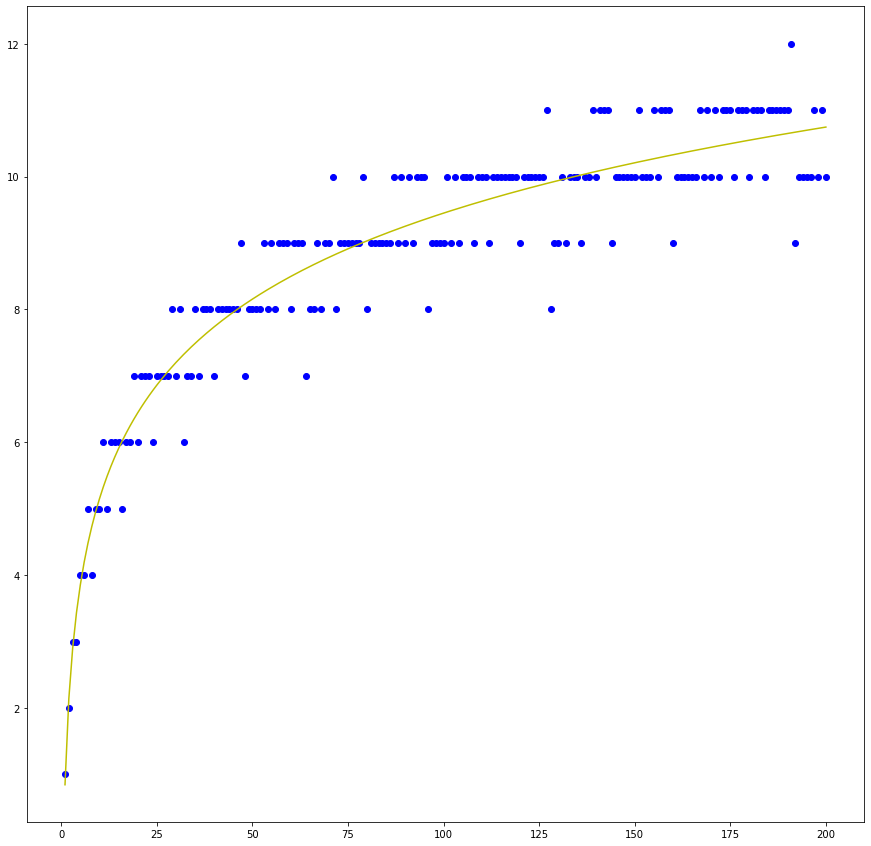

In [16]:
import pylab as plt
    
numbers = []
lengths = []

for n in range(1,201):
    numbers.append(n)
    length = len(splitIndexVectorMethod(n))
    lengths.append(length)
    
plt.figure(figsize=(15, 15))
plt.scatter(numbers, lengths, color='b', marker='o')
m = matrix([[sum([float((log(i)**2)) for i in numbers]), sum([float(log(i)) for i in numbers])], [sum([float(log(i)) for i in numbers]), len(numbers)]])
vec = vector([sum([float(lengths[i] * log(numbers[i])) for i in range(len(numbers))]), sum(lengths)])
solution = m.solve_right(vec)
plt.plot(numbers, [solution[0] * log(i) + solution[1] for i in numbers], color = 'y')
plt.show()

#### Вывод

Из построенного графика видно, что $l(n)$ 

In [ ]:
for i in range(2, 11):
    print("n = {}, {} <= {}".format(i, len(splitting_index_vector(2 ** i -  1)), len(splitting_index_vector(i))+i-1))